# Payal Rathod

# The Sparks Foundation - Data Science & Business Analytics Internship

## TASK 6 Prediction using Design Tree Algorithm

The Purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. we require to predict the optimum number of clusters for the iris data set using supervised machine learning algorithm (Design Tree )

#### Importing necessory Libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('Iris.xls')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Visualizing the model

In [11]:
#scatterplot
colors=['red','orange','blue']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

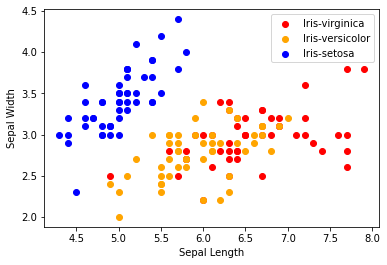

In [12]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

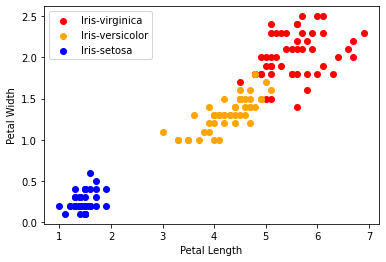

In [13]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

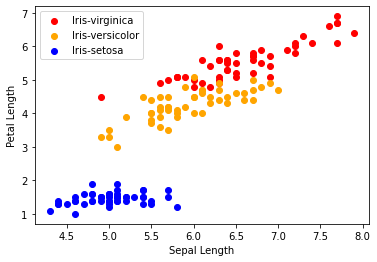

In [14]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

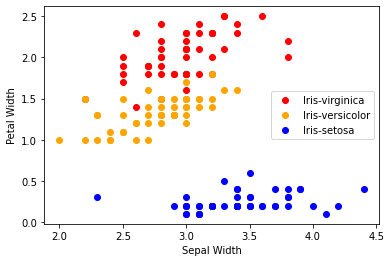

In [15]:
for i in range(3):
  x=df[df['Species']==species[i]]
  plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

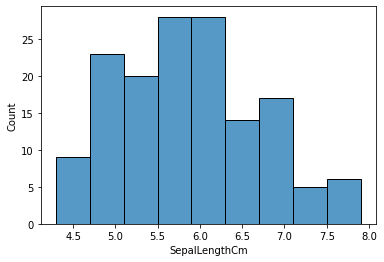

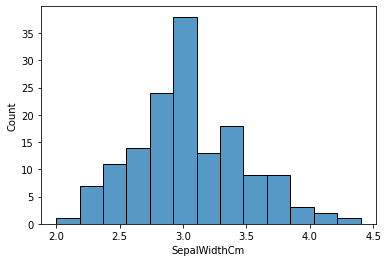

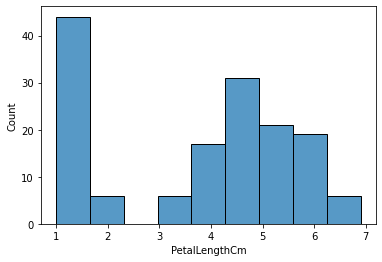

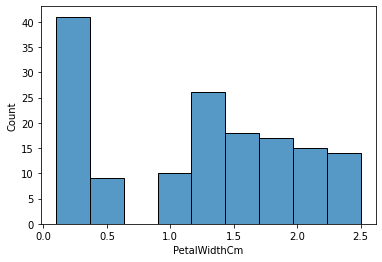

In [16]:
# check the distribution of data to ensure the data need normalize or not 
columns =['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
for feature in columns:
    sns.histplot(data=df,x=feature)
    plt.show()

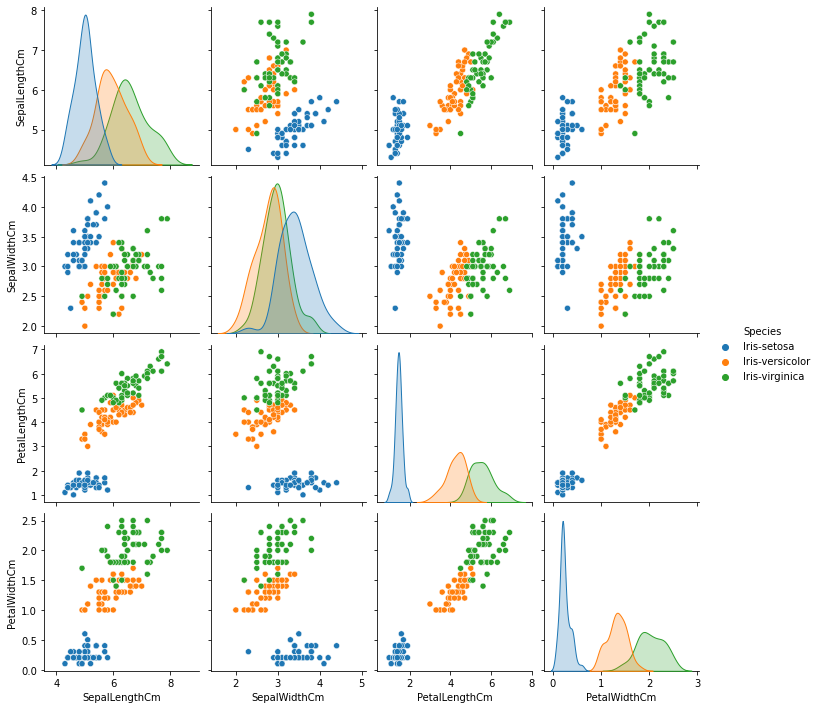

In [17]:
#Pair plot gives the relationship b/w all features distribution with each other..

sns.pairplot(df.drop(['Id'],axis=1), hue='Species')
plt.show()

## Encoding the target 

LABEL ENCODER

In machine learning, we usually deal with datasets which contains mutliple labels in one or more than one columns. These labels can be in the form of words or numbers.Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.

In [19]:
# Encode the data
data = df.copy()
data['Species'] = data ['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
y = data.iloc[:,-1]
X = data.drop(columns= ['Species' ,'Id'] )

## Splitting the data

In [20]:
X_train, X_test,y_train ,y_test = train_test_split(X,y,random_state=42,test_size=.35)

In [21]:
# Feature scalling
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Find optimal parameters for the model using GridSearchCV

In [22]:
from sklearn.tree import DecisionTreeClassifier #decision tree algorithm

In [24]:
dtc=DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [26]:
y_pred=dtc.predict(X_test)

In [27]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1], dtype=int64)

In [28]:
dtc.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1], dtype=int64)

In [29]:
dtc.predict([[2.3,3.7,4.1,5.6]])

array([2], dtype=int64)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix

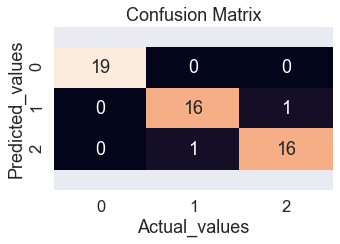

In [31]:
sns.set(font_scale=1.5)
fig, ax=plt.subplots(figsize=(5,3))
ax=sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt=".0f",cbar=False)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5);
ax.set_xlabel("Actual_values")
ax.set_ylabel("Predicted_values")
plt.title("Confusion Matrix")
plt.show()

In [32]:
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 16,  1],
       [ 0,  1, 16]], dtype=int64)

In [33]:
accuracy_score(y_test,y_pred)

0.9622641509433962

In [35]:
speciesTree=DecisionTreeClassifier(criterion='gini',max_depth=3)
speciesTree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [37]:
#Textual Representation of the splitting tree
from sklearn import tree
text_representation=tree.export_text(dtc)
print(text_representation)

|--- feature_3 <= -0.54
|   |--- class: 0
|--- feature_3 >  -0.54
|   |--- feature_3 <= 0.73
|   |   |--- feature_2 <= 0.91
|   |   |   |--- feature_0 <= -1.03
|   |   |   |   |--- feature_3 <= 0.19
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  0.19
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  -1.03
|   |   |   |   |--- feature_1 <= -1.80
|   |   |   |   |   |--- feature_3 <= 0.06
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_3 >  0.06
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_1 >  -1.80
|   |   |   |   |   |--- class: 1
|   |   |--- feature_2 >  0.91
|   |   |   |--- class: 2
|   |--- feature_3 >  0.73
|   |   |--- feature_2 <= 0.62
|   |   |   |--- feature_1 <= 0.22
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  0.22
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  0.62
|   |   |   |--- class: 2



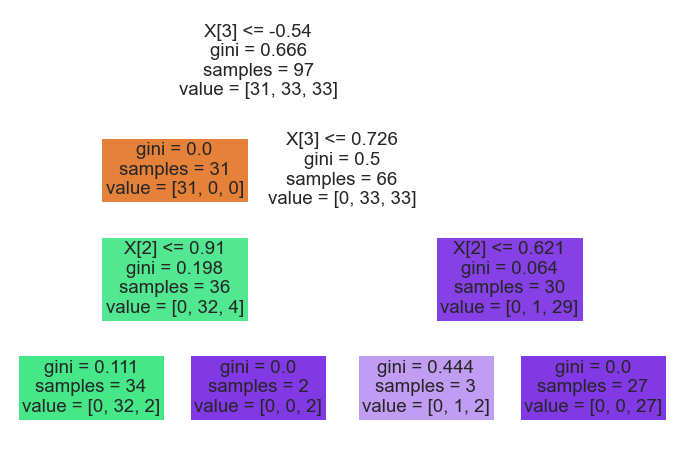

In [38]:
#Graphical Representation of the splitting tree
plt.figure(figsize=(12,8))
fig=tree.plot_tree(speciesTree,filled=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
desigion_tree = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'max_features': [None, 'auto', 'sqrt', 'log2'],
              'max_depth': [None, 1, 2, 5, 10],
              'min_samples_split': [2, 5, 10],
              'random_state': range(1,100)}
desigion_tree_cv= GridSearchCV(desigion_tree, param_grid, cv=20,verbose=1,n_jobs=-1,error_score='raise')
desigion_tree_cv.fit(X_train, y_train)

Fitting 20 folds for each of 11880 candidates, totalling 237600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 10584 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 21784 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 36184 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 53784 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 74584 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 98584 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 125784 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 156184 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 189784 tasks      | elapsed:  3.2min


In [15]:
desigion_tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 10,
 'random_state': 17}

In [16]:
y_pred = desigion_tree_cv.predict(X_test)

## Evaluating the model

In [17]:
accuracy_score(y_test,y_pred)

0.9811320754716981

In [18]:
confusion_matrix(y_pred,y_test)

array([[19,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 16]], dtype=int64)